In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 1200,               # DPI for high-quality PNG/JPEG
})

In [23]:
df = pd.read_csv("10ma.csv")
set(df["FatigInd"])

{'Low/Minimal', 'Optimal', 'Risk/Caution'}

In [24]:
color_map = {
    'Low/Minimal': 'skyblue',
    'Optimal': 'lightgreen',
    'Risk/Caution': 'salmon'
    # Add more categories and their corresponding colors if needed
}

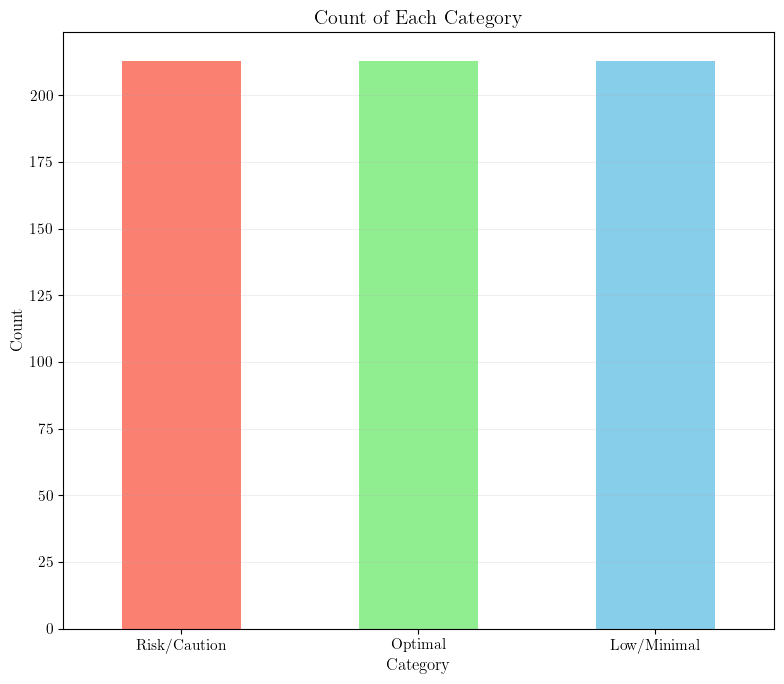

In [25]:
def plot_FATIGvsSEX(df):

    # Count occurrences of each category in FatigInd
    contagem = df['FatigInd'].value_counts()
    custom_order = ['Risk/Caution', 'Optimal', 'Low/Minimal']
    contagem = contagem[custom_order]
    colors = [color_map.get(cat, 'gray') for cat in contagem.index]
    # Plot the chart
    contagem.plot(kind='bar', color=colors, figsize=(8, 7))
    plt.title('Count of Each Category')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.2)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'assets/distribution_FatigInd(1).png', dpi=900, bbox_inches='tight', transparent=True)
    plt.show()


plot_FATIGvsSEX(df)

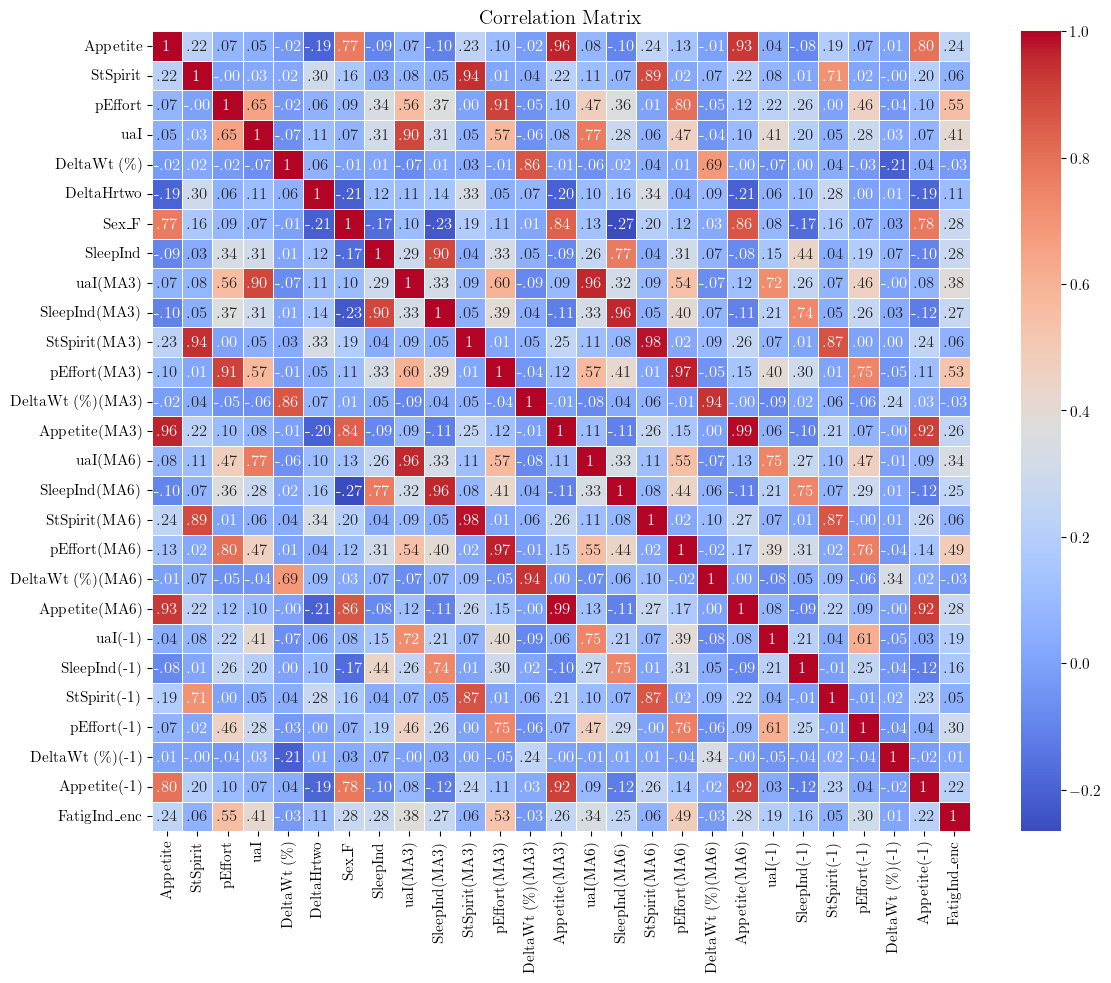

In [26]:
def plot_correlation(df):
       df_corr = df.copy()
       df_corr = df_corr.drop(columns=['Date'])
       #df_corr = df_corr[['Sex_F', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort',
       #       'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo', 'FatigInd']]
              
       # Codificar a variável target (se ela for categórica)
       # Suponha que 'target' seja a variável categórica
       encoder = LabelEncoder()
       df_corr['FatigInd_enc'] = encoder.fit_transform(df_corr['FatigInd'])

       # Selecione apenas as variáveis numéricas para calcular a correlação
       df_numeric = df_corr.select_dtypes(include=['float64', 'int64'])

       # Adicione a variável target codificada para análise de correlação
       df_numeric['FatigInd_enc'] = df_corr['FatigInd_enc']

       # Calcular a matriz de correlação
       corr_matrix = df_numeric.corr()
       corr_matrix.columns = corr_matrix.columns.str.replace('%', r'\%', regex=True)

       # Replace '%' with '\%' in rows (index)
       corr_matrix.index = corr_matrix.index.str.replace('%', r'\%', regex=True)

       def format_value(val):
              if val == 1:  # Handle perfect correlation as an integer
                     return '1'
              elif val == -1:  # Handle perfect negative correlation
                     return '-1'
              formatted = f"{val:.2f}"  # Format to two decimal places
              if formatted.startswith('-0'):  # Handle negative values
                     return '-' + formatted[2:]  # Remove the '0' after the '-'
              return formatted.lstrip('0')  # Remove leading zero for positive values

       annot_matrix = corr_matrix.map(format_value)

       # Plotando o heatmap
       plt.figure(figsize=(12, 10))
       sns.heatmap(corr_matrix, cmap='coolwarm', fmt='', annot=annot_matrix, linewidths=0.5)
       plt.title("Correlation Matrix")
       plt.tight_layout()
       plt.savefig(f'assets/correlation_matrix.png', transparent=True)
       plt.show()

plot_correlation(df)

In [27]:
df02 = df[["pEffort", "uaI",  "SleepInd", "Sex_F",
           "pEffort(MA6)", "SleepInd(MA6)", "uaI(MA6)", "Appetite(MA6)",
           "FatigInd"]]
df02
df02.to_csv("10ma_FEAUTURES.csv", index=False)

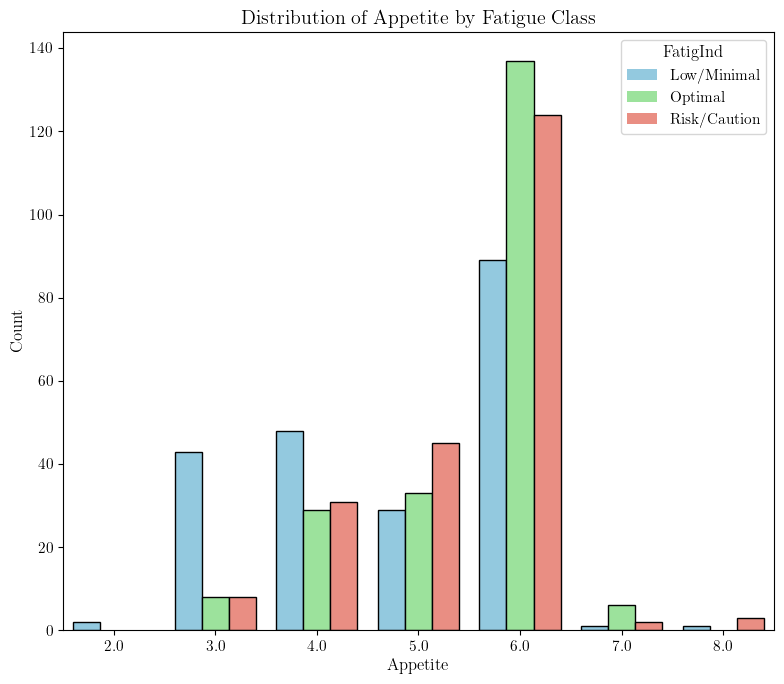

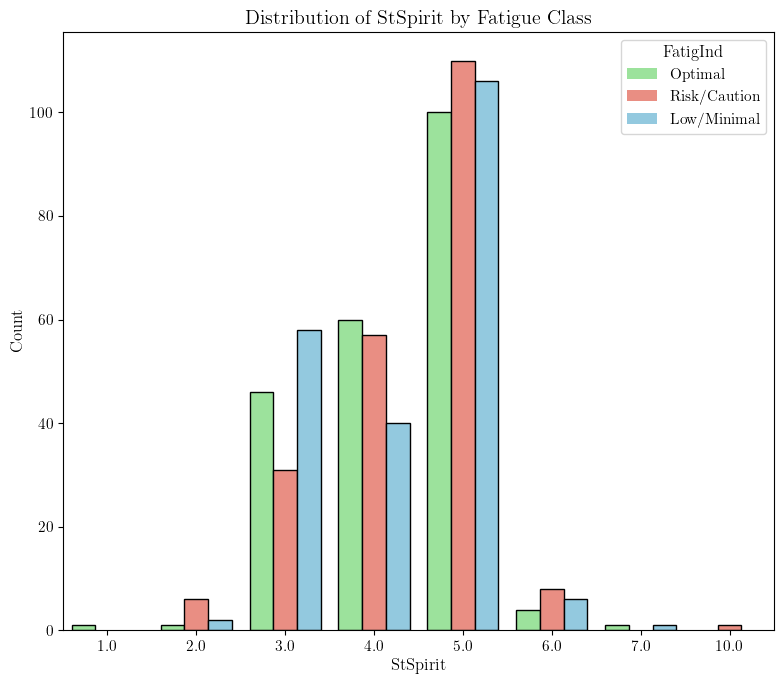

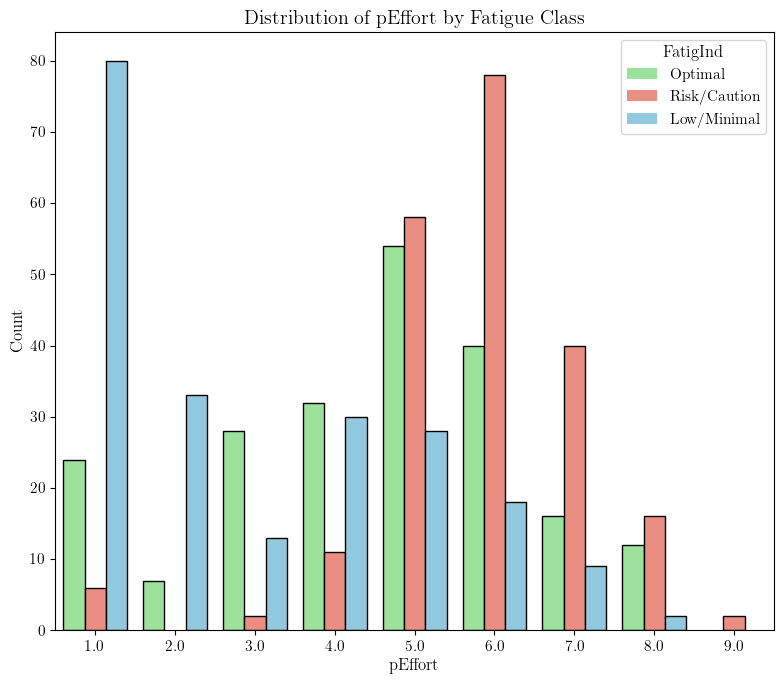

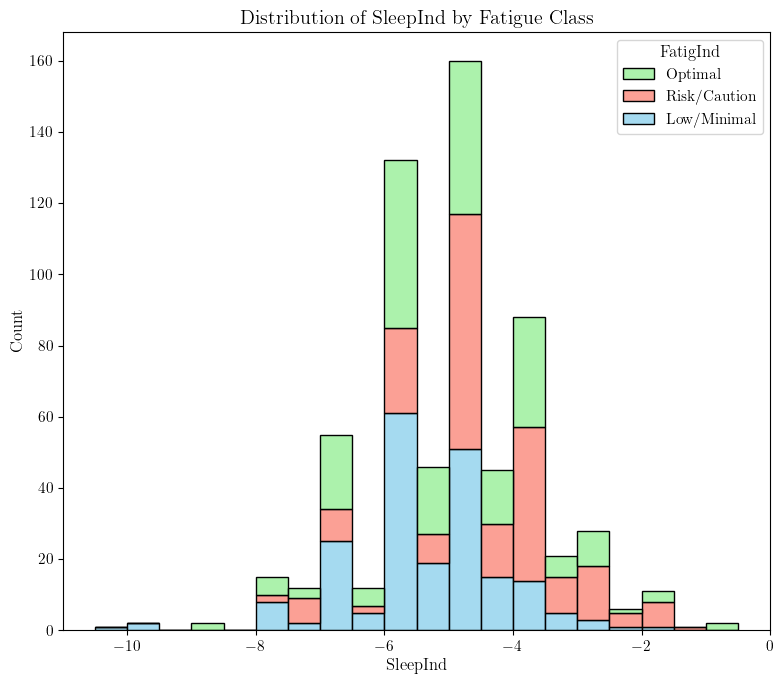

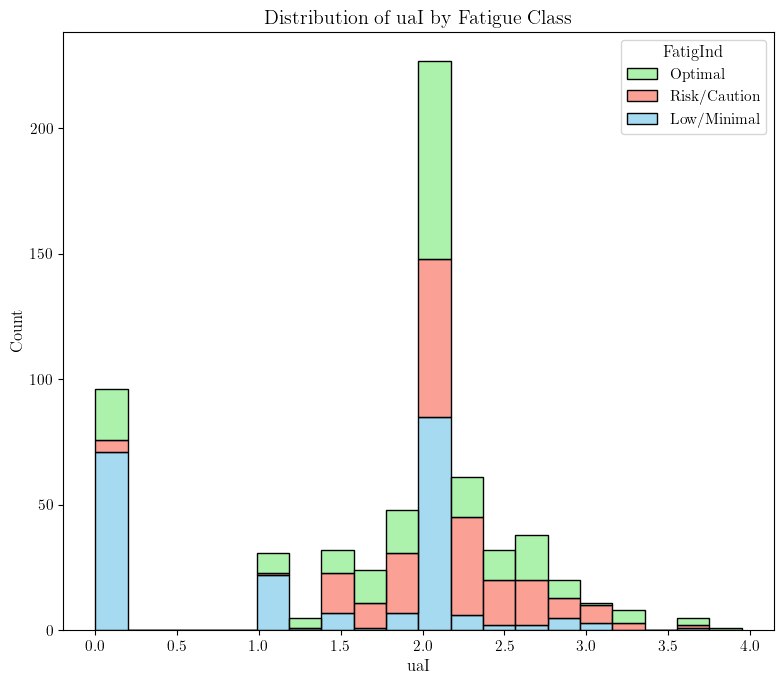

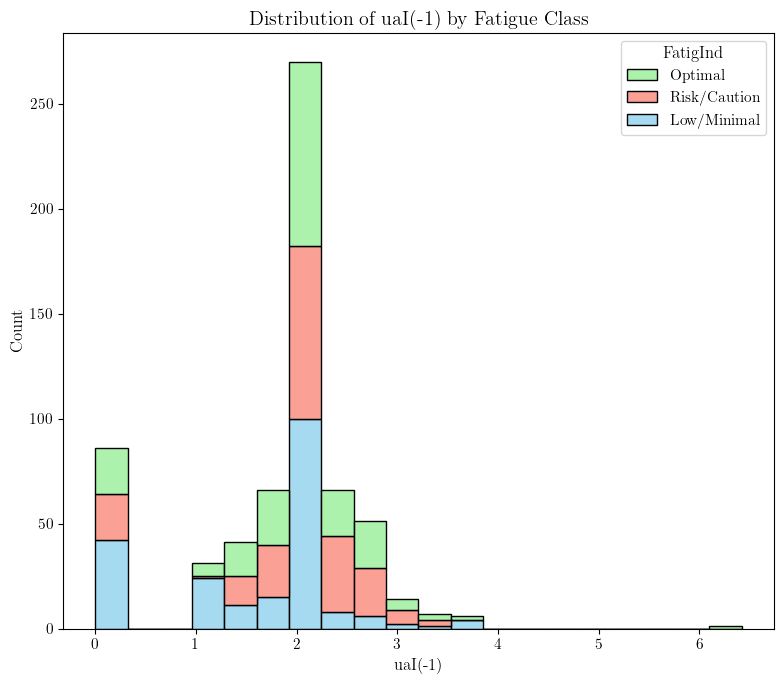

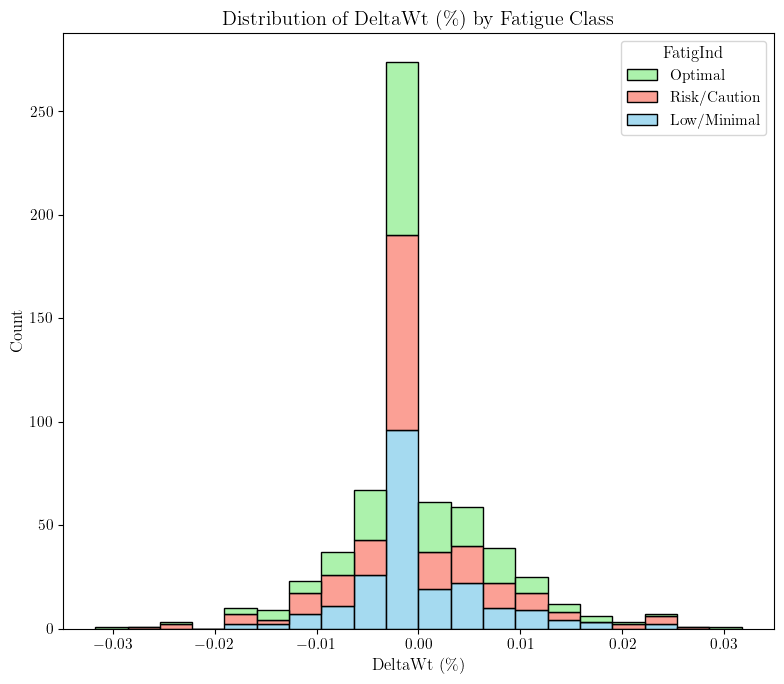

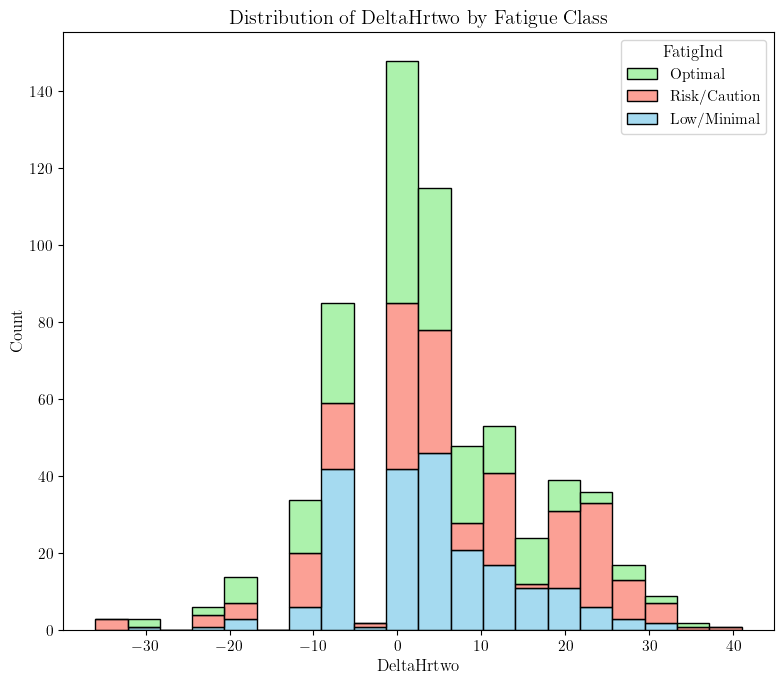

In [28]:
def plot_FATIGvsVARS(dfGB):
    for cc in ['Appetite', 'StSpirit', 'pEffort']:

        # Criando o gráfico de barras com base em 'Appetite' e 'FatigInd'
        plt.figure(figsize=(8,7))
        sns.countplot(data=dfGB, x=cc, hue='FatigInd', palette=color_map)
        for patch in plt.gca().patches:  # Get all the bars in the current Axes
            patch.set_edgecolor('black')  # Set the edge color to black
            patch.set_linewidth(1)        # Set the width of the edge to 1

        cc = cc.replace("%", "\\%") 
        # Adicionando título e rótulos
        plt.title(f'Distribution of {cc} by Fatigue Class')
        plt.xlabel(f'{cc}')
        plt.ylabel('Count')
        plt.tight_layout()
        cc = cc.replace("\%", "")
        plt.savefig(f'assets/distribution_{cc}.png', dpi=900, bbox_inches='tight', transparent=True)

        # Exibindo o gráfico
        plt.show()

    for cc in ['SleepInd','uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo']:

        # Criando o gráfico de barras com base em 'Appetite' e 'FatigInd'
        plt.figure(figsize=(8,7))
        sns.histplot(data=dfGB, x=cc, hue='FatigInd', palette=color_map, bins=20, kde=False,multiple='stack')

        cc = cc.replace("%", "\\%") 
        # Adicionando título e rótulos
        plt.title(f'Distribution of {cc} by Fatigue Class')
        plt.xlabel(f'{cc}')
        plt.ylabel('Count')

        plt.tight_layout()
        cc = cc.replace("\%", "")
        plt.savefig(f'assets/distribution_{cc}.png', dpi=900, bbox_inches='tight', transparent=True)

        # Exibindo o gráfico
        plt.show()

plot_FATIGvsVARS(df)